# 人工知能とソフトコンピューティング 第4回 線形分類 課題

### 2023TS054 大橋七熙

In [23]:
from pathlib import Path # ファイルパスの取り扱い
import pandas as pd # データの取り扱い（CSVからの読み込みに利用）
from pandas import Series, DataFrame
import numpy as np # 数値計算
import matplotlib.pyplot as plt # グラフ描画
import matplotlib.cm # 描画色の管理・生成
from matplotlib.colors import ListedColormap # カラーマップ
from sklearn.metrics import accuracy_score # 分類精度
from sklearn.model_selection import train_test_split # 訓練データとテストデータの分割
from sklearn.linear_model import Perceptron # パーセプトロンオブジェクト

In [24]:
dataframe = pd.read_csv(Path("04_data", "data4.csv"))
dataframe_X = dataframe[["x", "y"]]
X = np.array(dataframe_X.values.reshape(-1, 2)) # numpy の二次元データの array に変換
# print(X)
t = dataframe.t.values.reshape(-1) # numpy の一次元データのarrayに変換

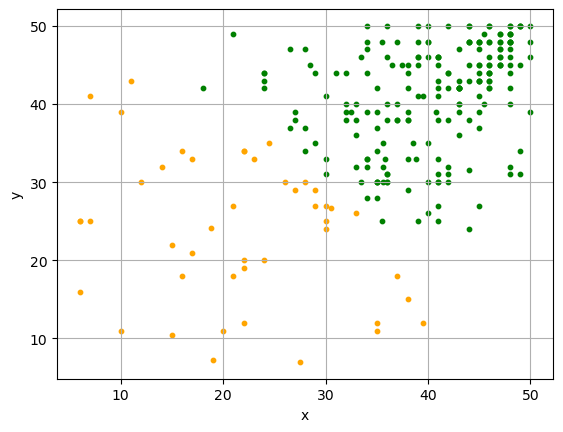

In [25]:
cmap = ("orange", "green", "cyan", "magenta", "blue", "red") # 描画の時に使う色のリスト，分類ごとに色を変える際に使用
n_classes = len(np.unique(t)) # 分類クラス数 
def show_scatter(subplot, X, t, cmap, emph = False): # X: 散布表示する点（x,y) の配列，t: (x,y)がどの分類かのラベル，cmap: 色リスト，emph: 強調するか否か
    subplot.set_xlabel("x") 
    subplot.set_ylabel("y")
    classes = np.unique(t) # 分類結果のラベルに出現するクラス（配列）
    for i in classes: # 正解ラベルの種類数だけ繰り返す（正解データから種類数を読み取る）
        if emph == True: # 点を強調して表示（サイズを大きくして，縁取りを付ける）
            subplot.scatter(X[t == i, 0], X[t == i, 1], marker = "o", color = cmap[i], linewidth = 1, edgecolor = "black", s = 20)
        else: # 通常表示
            subplot.scatter(X[t == i, 0], X[t == i, 1], marker = "o", color = cmap[i], s = 10)

fig = plt.figure()
subplot = fig.add_subplot()
show_scatter(subplot, X, t, cmap)
subplot.grid()
plt.show()

In [26]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 0) # 訓練データとテストデータの分離

In [27]:
early_stopping = True # EarlyStopping をするかどうか
n_iter_no_change = 100 # EarlyStopping までの繰り返し回数
eta0 = 1 # 学習率

classifier = Perceptron(early_stopping = early_stopping, n_iter_no_change = n_iter_no_change, eta0 = eta0, random_state = 0)

In [28]:
def fit_and_record_weights(classifier, max_iter, X_train, X_test, t_train, t_test):
    classifier.set_params(max_iter = max_iter) # Perceptron のパラメータを指定（最大 epoch 数）
    classifier.fit(X_train, t_train) # 確率的勾配降下法で訓練
    n_iter = classifier.n_iter_ # 訓練が終わるまでに勾配降下計算を繰り返した数
    train_score = classifier.score(X_train, t_train) # 訓練データの分類精度
    test_score = classifier.score(X_test, t_test) # テストデータの分類精度
    weights = classifier.coef_ # 重みベクトル
    intercept = classifier.intercept_ # 切片
    return n_iter, train_score, test_score, weights, intercept

In [29]:
epoch_max = 150 # 最大繰り返し回数
train_scores = [] # 訓練データに対する分類精度を格納する配列（空列で初期化）
test_scores = [] # テストデータに対する分類精度を格納する配列（空列で初期化）
w1_weights = [] # 重みベクトルの要素を格納する配列（空列で初期化）
w2_weights = [] # 重みベクトルの要素を格納する配列（空列で初期化）
w0_weights = [] # 重みベクトルの要素を格納する配列（空列で初期化）
for max_iter in range(1, epoch_max): # 1～epoch_max - 1 回繰り返し
    n_iter, train_score, test_score, weights, intercept = fit_and_record_weights(classifier, max_iter, X_train, X_test, t_train, t_test) # Perceptronの訓練
    # 配列に各回の記録を格納
    train_scores.append(train_score) 
    test_scores.append(test_score)
    w0_weights.append(intercept)
    w1_weights.append(weights[:, 0])
    w2_weights.append(weights[:, 1])

c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nanaki Ohashi\anaconda3\envs\AI-Soft-Prac\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

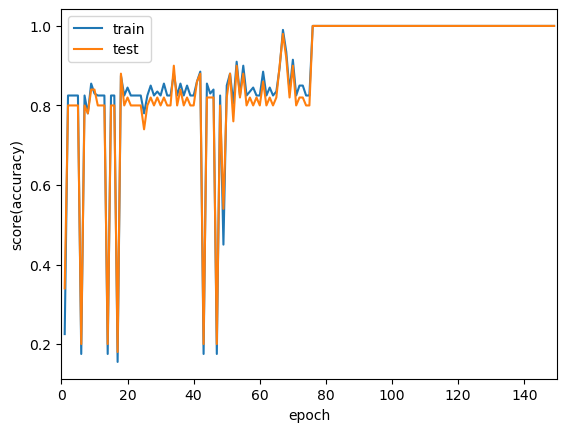

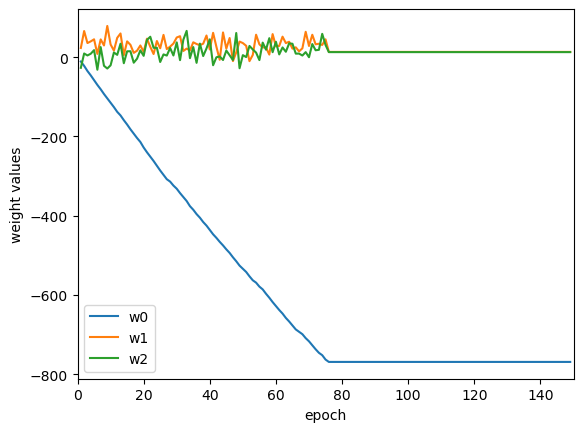

In [30]:
# 分類精度をグラフ描画する関数
def show_scores(subplot, epoch_max, train_scores, test_scores):
    subplot.set_xlim(0, epoch_max)
    subplot.set_xlabel("epoch")
    subplot.set_ylabel("score(accuracy)")
    subplot.plot(range(1, epoch_max), train_scores, label="train")
    subplot.plot(range(1, epoch_max), test_scores, label="test")
    subplot.legend()

# 重みベクトルをグラフ描画する関数
def show_weights(subplot, epoch_max, w0_weights, w1_weights, w2_weights):
    subplot.set_xlim(0, epoch_max)
    subplot.set_xlabel("epoch")
    subplot.set_ylabel("weight values")
    subplot.plot(range(1, epoch_max), w0_weights, label="w0")
    subplot.plot(range(1, epoch_max), w1_weights, label="w1")
    subplot.plot(range(1, epoch_max), w2_weights, label="w2")
    subplot.legend()

# 分類精度のグラフを描画（show_scores）を使用
fig = plt.figure()
subplot = fig.add_subplot()
show_scores(subplot, epoch_max, train_scores, test_scores)
plt.show()

# 重みベクトルのグラフを描画（計算された重みの組の数＝境界線の数）だけ表示
n_borders = len(w0_weights[0])
for i in range(0, n_borders):
    fig = plt.figure()
    subplot = fig.add_subplot()
    show_weights(subplot, epoch_max, np.array(w0_weights)[:, i], np.array(w1_weights)[:, i], np.array(w2_weights)[:, i])
    plt.show()

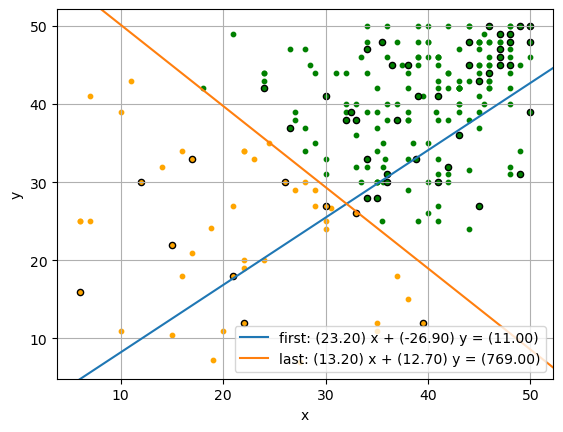

In [31]:
# グラフをプロットする範囲を計算(関数定義）
def calculate_plot_range(X_train, X_test):
    xmin, xmax = min(X_train[:, 0].min(), X_test[:, 0].min()), max(X_train[:, 0].max(), X_test[:, 0].max())
    ymin, ymax = min(X_train[:, 1].min(), X_test[:, 1].min()), max(X_train[:, 1].max(), X_test[:, 1].max())
    return xmin, xmax, ymin, ymax

# 散布図と境界線を描画する関数
def show_classification_border(subplot, xmin, xmax, ymin, ymax, w0, w1, w2, label = ""):
    # 重み，切片から x-y 平面上に分類の境界線を描画 
    linex = np.arange(xmin - 0.1 * (xmax - xmin), xmax + 0.1 * (xmax - xmin), 0.05 * (xmax - xmin))
    liney = - linex * w1 / w2 - w0 / w2
    subplot.plot(linex, liney, label = "{}: ({:=.2f}) x + ({:=.2f}) y = ({:=.2f})".format(label, w1, w2, -w0))

# 一つの境界ごとに一つの散布図との関係を表示
for i in range(0, n_borders):
    fig = plt.figure()
    subplot = fig.add_subplot()
    subplot.set_xlabel("x")
    subplot.set_ylabel("y")
    xmin, xmax, ymin, ymax = calculate_plot_range(X_train, X_test)
    # グラフの表示範囲を設定
    subplot.set_xlim(xmin - 0.05 * (xmax - xmin), xmax + 0.05 * (xmax - xmin))
    subplot.set_ylim(ymin - 0.05 * (ymax - ymin), ymax + 0.05 * (ymax - ymin))    
    show_classification_border(subplot, xmin, xmax, ymin, ymax, w0_weights[0][i], w1_weights[0][i], w2_weights[0][i], "first")
    show_classification_border(subplot, xmin, xmax, ymin, ymax, w0_weights[-1][i], w1_weights[-1][i], w2_weights[-1][i], "last")

    # ステップ2 で定義した show_scatter() を呼び出して散布図を表示
    show_scatter(subplot, X_train, t_train, cmap)
    show_scatter(subplot, X_test, t_test, cmap, True)
    subplot.grid()
    subplot.legend()
    plt.show()
# 複数の境界がある場合（3分類以上の場合），すべての境界線と散布図を表示
if n_borders > 1:
    fig = plt.figure()
    subplot = fig.add_subplot()
    subplot.set_xlabel("x")
    subplot.set_ylabel("y")
    for i in range(0, n_borders):
        xmin, xmax, ymin, umax = calculate_plot_range(X_train, X_test)
        subplot.set_xlim(xmin - 0.05 * (xmax - xmin), xmax + 0.05 * (xmax - xmin))
        subplot.set_ylim(ymin - 0.05 * (ymax - ymin), ymax + 0.05 * (ymax - ymin))
        show_classification_border(subplot, xmin, xmax, ymin, ymax, w0_weights[-1][i], w1_weights[-1][i], w2_weights[-1][i], "last")
    show_scatter(subplot, X_train, t_train, cmap)
    show_scatter(subplot, X_test, t_test, cmap, True)
    subplot.grid()
    plt.show()

In [32]:
X_predict = []
X_predict.append((0, 0)) # この値を変更して，特定の(x,y)がどのクラスに分類されるか確かめる
classifier.predict(X_predict)

array([0])

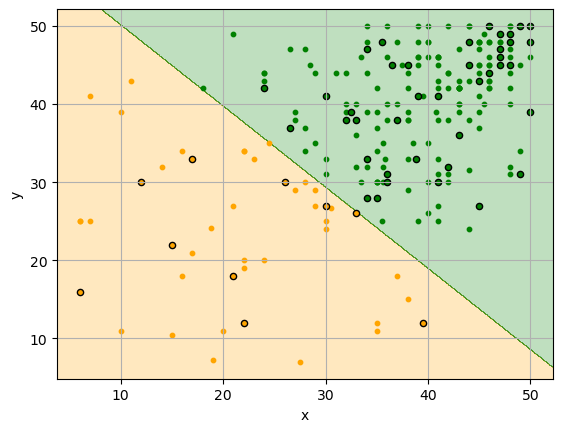

In [33]:
# 予測した結果を領域表示する関数
def show_classification_regions(classifier, subplot, X_train, X_test, t_train, t_test):
    # グラフをプロットする範囲を計算
    xmin, xmax, ymin, ymax = calculate_plot_range(X_train, X_test)
    # グラフの表示範囲を設定
    xmin, xmax, ymin, ymax = xmin - 0.05 * (xmax - xmin), xmax + 0.05 * (xmax - xmin), ymin - 0.05 * (ymax - ymin), ymax + 0.05 * (ymax -ymin)
    subplot.set_xlim(xmin, xmax)
    subplot.set_ylim(ymin, ymax)
    # 予測に与えるサンプルを取るメッシュの解像度（0.01 * (max - min)
    xres = 0.001 * (xmax - xmin)
    yres = 0.001 * (ymax - ymin)
    xmesh, ymesh = np.meshgrid(np.arange(xmin, xmax, xres), np.arange(ymin, ymax, yres)) # 等間隔で (x, y) のメッシュを作成
    Z = classifier.predict(np.array([xmesh.ravel(), ymesh.ravel()]).T) # 作成したメッシュを xの並び，yの並びにして（行列の転置）予測
    Z = Z.reshape(xmesh.shape) # 予測結果の列をサンプルの形式と合わせる
    subplot.contourf(xmesh, ymesh, Z, alpha=0.25, cmap = ListedColormap(cmap[:n_classes])) # 領域を Z の値に応じて塗りつぶし
    # ステップ2 で定義した show_scatter() を呼び出して散布図を表示
    show_scatter(subplot, X_train, t_train, cmap) # 訓練データ
    show_scatter(subplot, X_test, t_test, cmap, True) # テストデータ（強調表示する）

# 予測結果の領域表示
fig = plt.figure()
subplot = fig.add_subplot()
subplot.set_xlabel("x")
subplot.set_ylabel("y")
show_classification_regions(classifier, subplot, X_train, X_test, t_train, t_test)
subplot.grid()
plt.show()

## 考察結果
### 訓練された分類器の境界線の重み ($𝑤_0,𝑤_1,𝑤_2$)<br>それが構成する境界線 $𝑤_1𝑥+𝑤_2𝑦=−𝑤_0$をどう解釈するか
訓練された分類器の重みは以下の通りである。<br>

In [42]:
print("訓練後の重み（weights）:")
print("w1, w2 =", classifier.coef_)
print("\n訓練後の切片（intercept）:")
print("w0 =", classifier.intercept_)

for i in range(n_borders):
    w0 = classifier.intercept_[i]
    w1 = classifier.coef_[i, 0]
    w2 = classifier.coef_[i, 1]
    print(f"\n境界線 {i+1}:")
    print(f"  w0 = {w0:.4f}")
    print(f"  w1 = {w1:.4f}")
    print(f"  w2 = {w2:.4f}")
    print(f"  境界線の式: {w1:.4f}x + {w2:.4f}y = {-w0:.4f}")

訓練後の重み（weights）:
w1, w2 = [[13.2 12.7]]

訓練後の切片（intercept）:
w0 = [-769.]

境界線 1:
  w0 = -769.0000
  w1 = 13.2000
  w2 = 12.7000
  境界線の式: 13.2000x + 12.7000y = 769.0000


### 重みの解釈

訓練された分類器の境界線は 13.2x + 12.7y = 769.0 である。

#### 1. 境界線の傾きと方向
境界線を $y = mx + b$ の形に変形すると：
$$y = -\frac{13.2}{12.7}x + \frac{769.0}{12.7}$$
$$y \approx -1.04x + 60.6$$

- 傾き: 約 -1.04（ほぼ -45度の直線）
- y切片: 約 60.6

#### 2. 重みの大きさの意味
- $w_1 = 13.2$ と $w_2 = 12.7$ はほぼ同じ大きさである
- これは、x方向の変化とy方向の変化が分類に対してほぼ同等の影響を与えることを意味する

#### 3. 切片 $w_0 = -769.0$ の意味
- $w_0$ が大きな負の値であることから、境界線は原点から大きく離れた位置にある
- 具体的には、境界線は右上の領域（$x$ と $y$ が大きい領域）を通過している
- これにより、原点付近の点は $13.2x + 12.7y - 769.0 < 0$ となり、一方のクラスに分類される
- 右上の点（$x$ と $y$ が大きい点）は $13.2x + 12.7y - 769.0 > 0$ となり、もう一方のクラスに分類される

#### 4. 境界線と分類の関係
パーセプトロンの決定関数は以下のように動作する：
- $13.2x + 12.7y - 769.0 > 0$ の領域 → クラス1に分類
- $13.2x + 12.7y - 769.0 < 0$ の領域 → クラス0に分類
